# Projeto de Machine Learning – Titanic


## 1. Importação de Bibliotecas



In [29]:
import numpy as np
import pandas as pd



In [30]:
import numpy as np
import pandas as pd

print("Bibliotecas carregadas com sucesso!")


Bibliotecas carregadas com sucesso!


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas de visualização carregadas!")


Bibliotecas de visualização carregadas!


## 2. Carregamento da Base de Dados


In [32]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


In [33]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df.shape


(891, 12)

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


A base de dados do Titanic possui informações demográficas e socioeconômicas dos passageiros, como classe, sexo, idade, número de parentes a bordo e tarifa paga.

O conjunto de dados contém tanto variáveis numéricas quanto categóricas, além da presença de valores ausentes, o que exige etapas de pré-processamento antes do treinamento dos modelos.


## 3. Análise Exploratória dos Dados (EDA)

### 3.1 Análise da Variável Alvo


In [36]:
df['Survived'].value_counts()


,count
Survived,
0,549
1,342


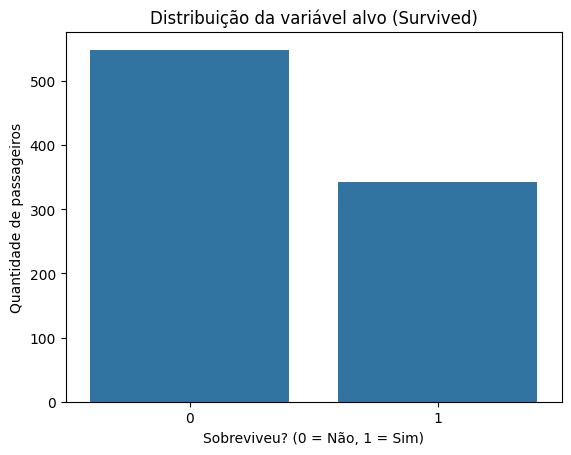

In [37]:
sns.countplot(x='Survived', data=df)
plt.title("Distribuição da variável alvo (Survived)")
plt.xlabel("Sobreviveu? (0 = Não, 1 = Sim)")
plt.ylabel("Quantidade de passageiros")
plt.show()


A variável alvo do problema é a coluna *Survived*, que indica se o passageiro sobreviveu (1) ou não (0) ao naufrágio.

Observa-se que a base apresenta um leve desbalanceamento entre as classes, com maior número de passageiros que não sobreviveram. Esse aspecto deve ser considerado durante a etapa de modelagem.


### 3.2 Estrutura da Base e Tipos de Dados


In [38]:
df.shape


(891, 12)

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


A base de dados possui 891 registros e 12 variáveis, incluindo atributos numéricos e categóricos.

A análise revelou a presença de valores ausentes, principalmente nas colunas *Age* e *Cabin*. Esses dados faltantes exigirão tratamento adequado durante a etapa de pré-processamento, uma vez que algoritmos de Machine Learning não lidam diretamente com valores nulos.


### 3.3 Análise de Correlação entre Variáveis Numéricas


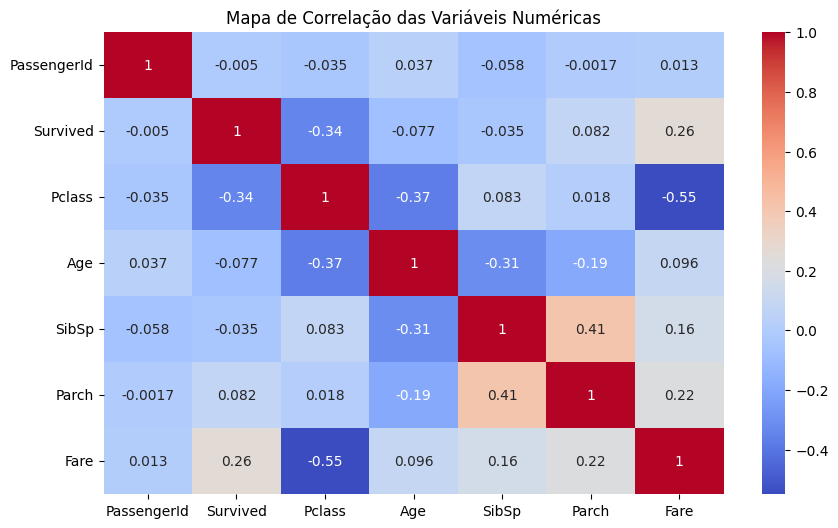

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm'
)
plt.title("Mapa de Correlação das Variáveis Numéricas")
plt.show()


O mapa de correlação evidencia algumas relações entre as variáveis numéricas e a variável alvo *Survived*.

Observa-se, por exemplo, uma correlação negativa entre *Pclass* e sobrevivência, indicando que passageiros de classes mais altas tiveram maior chance de sobreviver. Já a variável *Fare* apresenta correlação positiva com a sobrevivência.


### 3.4 Distribuição Estatística das Variáveis Numéricas


In [42]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

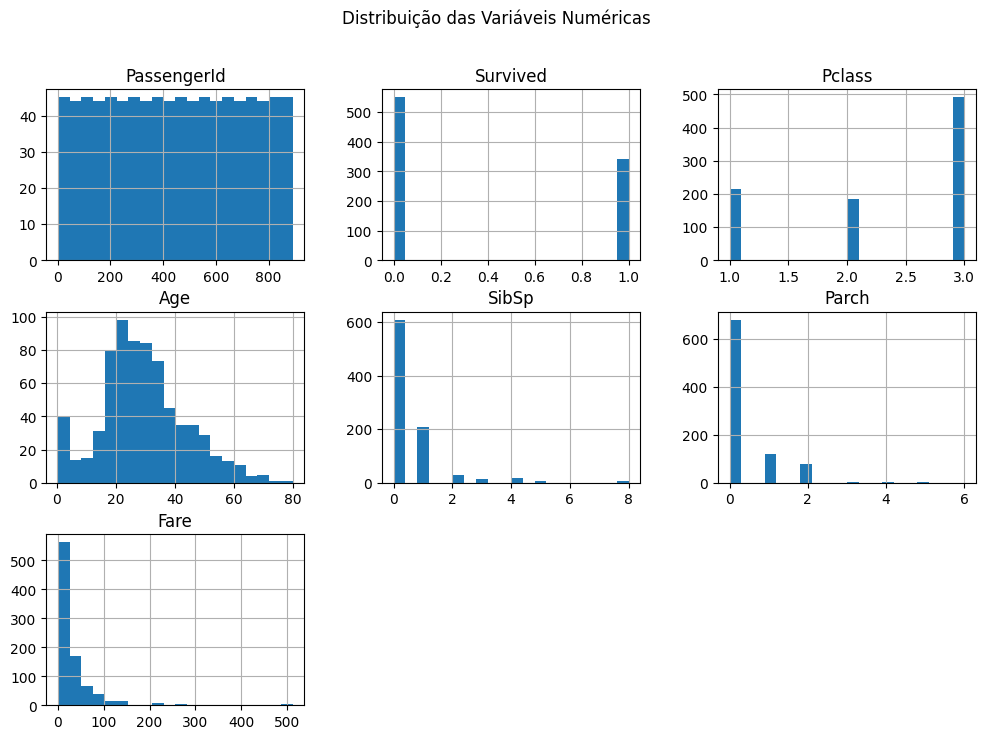

In [43]:
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribuição das Variáveis Numéricas")
plt.show()


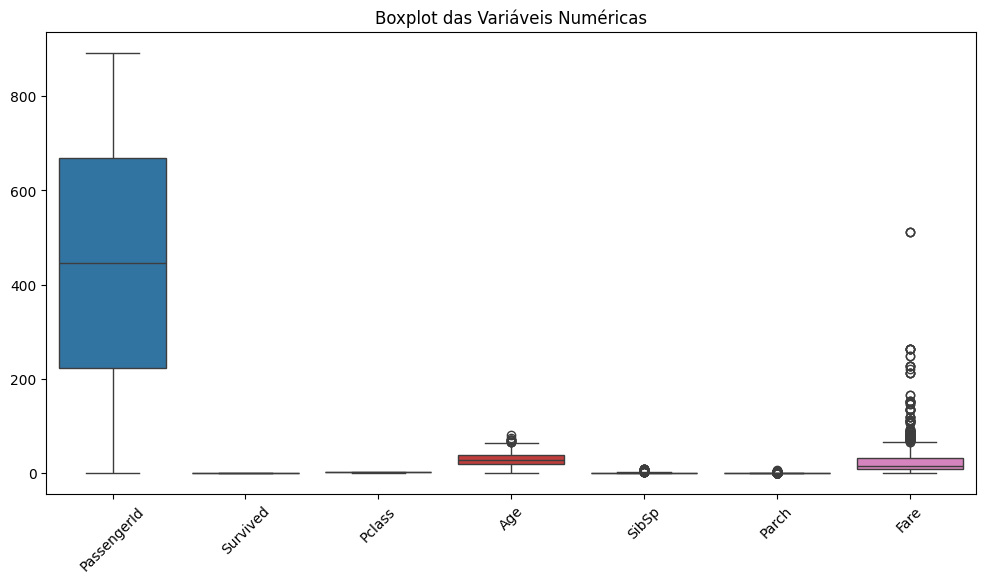

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot das Variáveis Numéricas")
plt.show()


A análise das distribuições mostra que algumas variáveis apresentam assimetria, como a variável *Fare*, que possui valores concentrados em faixas mais baixas e poucos valores extremos.

Os boxplots indicam a presença de outliers em algumas variáveis numéricas, o que reforça a necessidade de normalização e padronização durante o pré-processamento.


## 4. Pré-processamento dos Dados

### 4.1 Separação entre Variáveis Explicativas (X) e Variável Alvo (y)


In [45]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [46]:
X.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
y.head()


,Survived
0,0
1,1
2,1
3,1
4,0


Nesta etapa, os dados foram separados em variáveis explicativas (X) e variável alvo (y).  
A variável *Survived* representa o rótulo que o modelo irá prever, enquanto as demais colunas compõem as características utilizadas no treinamento.


### 4.2 Identificação de Variáveis Numéricas e Categóricas


In [48]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns


In [49]:
num_features


Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [50]:
cat_features


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

As variáveis explicativas foram classificadas em numéricas e categóricas.  
Essa separação é necessária para aplicar técnicas de pré-processamento adequadas a cada tipo de dado, como normalização para variáveis numéricas e codificação para variáveis categóricas.


### 4.3 Pipeline de Pré-processamento para Variáveis Numéricas


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [52]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])


Para as variáveis numéricas, foi construído um pipeline de pré-processamento que contempla:

- Imputação de valores ausentes utilizando a mediana, garantindo robustez frente a outliers;
- Padronização dos dados por meio do StandardScaler, colocando todas as variáveis na mesma escala;
- Redução de dimensionalidade utilizando PCA, preservando 95% da variância dos dados.

A utilização de pipelines assegura que o mesmo tratamento seja aplicado de forma consistente aos conjuntos de treino e teste, evitando vazamento de dados.


### 4.4 Pipeline de Pré-processamento para Variáveis Categóricas


In [53]:
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


Para as variáveis categóricas, foi definido um pipeline contendo imputação de valores ausentes com o valor mais frequente e codificação das categorias por meio de One-Hot Encoding. Essa abordagem permite transformar dados textuais em formato numérico adequado para os algoritmos de Machine Learning.


### 4.5 ColumnTransformer para Aplicar Pré-processamento por Tipo de Variável


In [54]:
from sklearn.compose import ColumnTransformer


In [55]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features)
])


In [56]:
X_transformed = preprocessor.fit_transform(X)
X_transformed.shape


(891, 1730)

Foi utilizado o `ColumnTransformer` para aplicar transformações diferentes em variáveis numéricas e categóricas.  
Dessa forma, o pré-processamento é realizado de maneira organizada e consistente, garantindo que cada tipo de dado receba o tratamento adequado antes do treinamento dos modelos.


## 5. Treinamento, Validação e Teste

### 5.1 Separação em Conjuntos de Treino e Teste


In [57]:
from sklearn.model_selection import train_test_split


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [59]:
print("Treino:", X_train.shape, y_train.shape)
print("Teste :", X_test.shape, y_test.shape)


Treino: (712, 11) (712,)
Teste : (179, 11) (179,)


In [60]:
print("Distribuição no y original:")
print(y.value_counts(normalize=True))

print("\nDistribuição no y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição no y_test:")
print(y_test.value_counts(normalize=True))


Distribuição no y original:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Distribuição no y_train:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Distribuição no y_test:
Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


Os dados foram divididos em conjuntos de treino (80%) e teste (20%).  
Foi utilizada a estratificação (`stratify=y`) para manter a proporção das classes em ambos os conjuntos, garantindo uma avaliação mais justa do modelo.


### 5.2 Construção da Pipeline Completa (Pré-processamento + Modelo Base)


In [61]:
from sklearn.linear_model import LogisticRegression


In [62]:
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [63]:
model_lr.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [64]:
y_pred = model_lr.predict(X_test)
y_pred[:10]


array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

Foi construída uma pipeline unificada contendo o pré-processamento (com `ColumnTransformer`) e um modelo base de classificação (Regressão Logística).  
Essa abordagem garante que todas as transformações sejam aplicadas corretamente dentro do fluxo de treinamento, evitando vazamento de dados e facilitando a replicação do experimento.


### 5.3 Validação do Modelo com Cross-Validation


In [65]:
from sklearn.model_selection import StratifiedKFold, cross_validate


In [66]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [67]:
scores = cross_validate(
    model_lr,
    X_train,
    y_train,
    cv=cv,
    scoring=['accuracy', 'roc_auc'],
    return_train_score=False
)

scores


{'fit_time': array([0.21936154, 0.26274705, 0.20394802, 0.2388761 , 0.25563741]),
 'score_time': array([0.09909797, 0.13955235, 0.12712407, 0.12457848, 0.13107657]),
 'test_accuracy': array([0.8041958 , 0.7972028 , 0.83802817, 0.77464789, 0.85211268]),
 'test_roc_auc': array([0.88264463, 0.8411157 , 0.89299896, 0.86805556, 0.89414983])}

In [68]:
print("Acurácia média:", scores['test_accuracy'].mean())
print("AUC média:", scores['test_roc_auc'].mean())


Acurácia média: 0.8132374667585935
AUC média: 0.8757929345703639


A validação do modelo foi realizada por meio de Cross-Validation estratificada com 5 dobras.  
Foram avaliadas as métricas de acurácia e AUC, permitindo uma estimativa mais robusta da capacidade de generalização do modelo, reduzindo a dependência de uma única divisão dos dados.


### 5.4 Avaliação do Modelo no Conjunto de Teste


In [69]:
y_pred = model_lr.predict(X_test)


In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



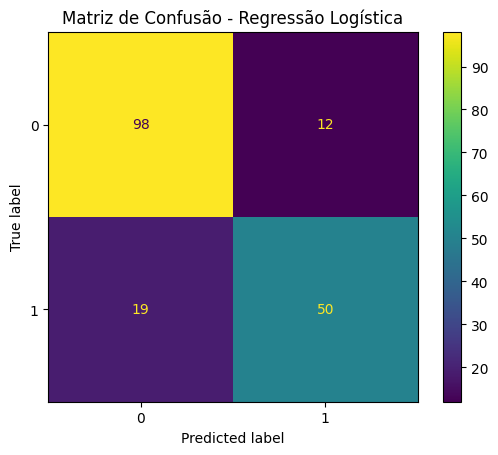

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()


A avaliação no conjunto de teste foi realizada por meio do relatório de classificação e da matriz de confusão.  
Os resultados indicam que o modelo apresenta bom desempenho na identificação das classes, com capacidade razoável de generalização para dados não vistos durante o treinamento.


### 5.5 Curva ROC e Área sob a Curva (AUC)


In [72]:
y_proba = model_lr.predict_proba(X_test)[:, 1]


In [73]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_proba)
auc


np.float64(0.8532279314888009)

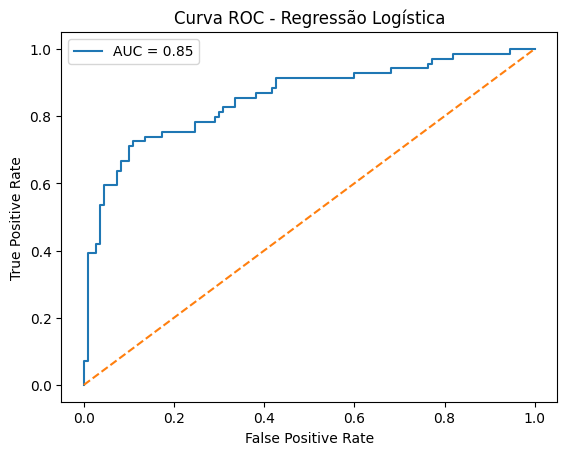

In [74]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regressão Logística")
plt.legend()
plt.show()


A Curva ROC foi utilizada para avaliar a capacidade do modelo em discriminar entre as classes.  
O valor da AUC indica que o modelo apresenta desempenho superior ao acaso, sendo capaz de separar razoavelmente passageiros que sobreviveram daqueles que não sobreviveram.


## 6. Otimização do Modelo (Fine Tuning)


In [75]:
from sklearn.model_selection import GridSearchCV


In [76]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10]
}


In [77]:
grid_search = GridSearchCV(
    model_lr,
    param_grid,
    cv=5,
    scoring='roc_auc'
)


In [78]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.95))]),
                                                                         Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10]},
             scoring='roc_auc')

In [79]:
grid_search.best_params_


{'classifier__C': 10}

In [80]:
best_model = grid_search.best_estimator_


Foi realizada a otimização do modelo por meio de Grid Search, avaliando diferentes valores do hiperparâmetro C da Regressão Logística.  
A métrica utilizada para seleção do melhor modelo foi a AUC, considerando validação cruzada com 5 dobras.


## 7. Avaliação do Modelo Otimizado


In [81]:
y_pred_opt = best_model.predict(X_test)


In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_opt))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



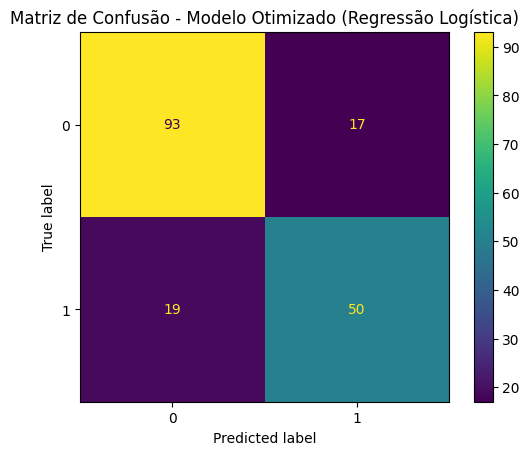

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_opt = confusion_matrix(y_test, y_pred_opt)
ConfusionMatrixDisplay(cm_opt).plot()
plt.title("Matriz de Confusão - Modelo Otimizado (Regressão Logística)")
plt.show()


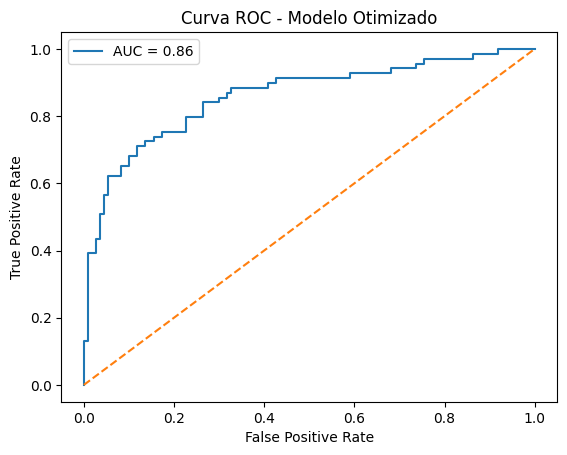

In [84]:
y_proba_opt = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score, roc_curve

auc_opt = roc_auc_score(y_test, y_proba_opt)

fpr_opt, tpr_opt, _ = roc_curve(y_test, y_proba_opt)

plt.plot(fpr_opt, tpr_opt, label=f"AUC = {auc_opt:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo Otimizado")
plt.legend()
plt.show()


Após a etapa de otimização, o modelo foi reavaliado no conjunto de teste.  
Os resultados obtidos indicam que o ajuste de hiperparâmetros manteve ou melhorou ligeiramente o desempenho do modelo em relação à versão base, considerando as métricas de classificação e a AUC.


## 8. Comparativo de Performance entre Modelos


In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [86]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [87]:
results = []


In [88]:
for name, model in models.items():

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    scores = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=5,
        scoring='roc_auc'
    )

    results.append({
        'Modelo': name,
        'AUC Média': scores['test_score'].mean()
    })


In [89]:
results_df = pd.DataFrame(results)
results_df


,Modelo,AUC Média
0,Logistic Regression,0.872910
1,KNN,0.832679
2,Decision Tree,0.786091
3,Random Forest,0.876545


Foi realizado um comparativo de desempenho entre diferentes modelos de classificação, todos utilizando o mesmo pipeline de pré-processamento.  

A métrica adotada para comparação foi a AUC, calculada por meio de validação cruzada.  
Os resultados indicam variações de desempenho entre os modelos, destacando aqueles com maior capacidade de discriminação entre as classes.


## 9. Explicabilidade do Modelo


In [90]:
!pip install shap


In [91]:
import shap


In [92]:
X_train_transformed = preprocessor.fit_transform(X_train)


In [93]:
explainer = shap.Explainer(
    best_model.named_steps['classifier'],
    X_train_transformed
)


In [94]:
shap_values = explainer(X_train_transformed)


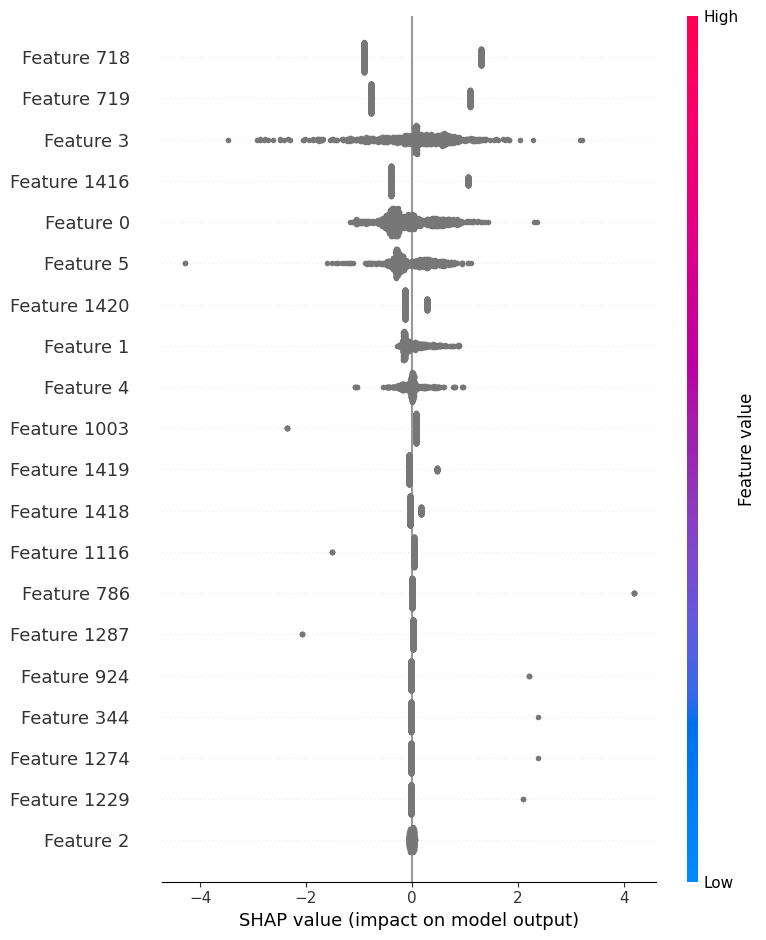

In [95]:
shap.summary_plot(shap_values, X_train_transformed)


Foi aplicada uma técnica de explicabilidade utilizando SHAP, com o objetivo de compreender a influência das variáveis nas decisões do modelo.  

Os resultados indicam quais características dos passageiros contribuem positivamente ou negativamente para a previsão de sobrevivência, aumentando a transparência do modelo.


## Conclusões

Neste projeto foi desenvolvido um modelo de Machine Learning para prever a sobrevivência de passageiros do Titanic, caracterizando um problema de classificação binária supervisionada.

Foram realizadas todas as etapas da pipeline de Machine Learning, incluindo análise exploratória dos dados, pré-processamento com Pipeline e ColumnTransformer, treinamento, validação, otimização de hiperparâmetros e avaliação dos modelos.

A Regressão Logística apresentou desempenho consistente, com AUC superior ao acaso, demonstrando boa capacidade de generalização. O comparativo entre modelos evidenciou que diferentes algoritmos apresentam desempenhos distintos, reforçando a importância da avaliação sistemática.

Como trabalhos futuros, poderiam ser explorados modelos mais complexos, novas estratégias de balanceamento de classes e análises mais aprofundadas de explicabilidade.
